# Practical example

## Importing the relevant libraries

In [231]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [232]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [233]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [234]:
data = raw_data.drop(['Model'],axis=1)
# data = raw_data.copy()
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Dealing with missing values

In [235]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [236]:
data_no_mv = data.dropna(axis=0)

In [237]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Exploring the PDFs

/tmp/ipykernel_13871/216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

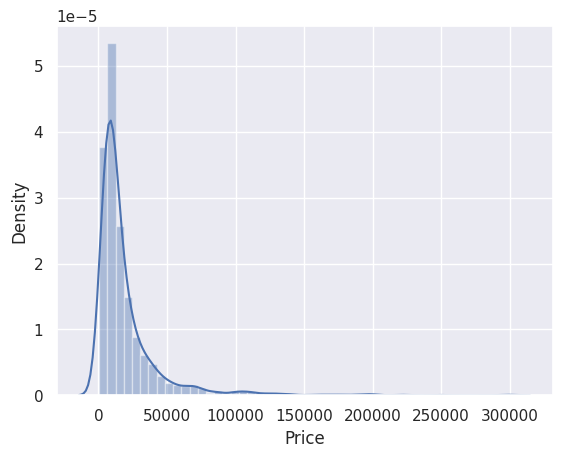

In [238]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [239]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols('Price ~ Mileage+EngineV', data=data_no_mv).fit()

In [240]:
# x = regression.outlier_test()
# x

In [241]:
# print('Bad data points (bonf(p) < 0.05):')

# outliers = x[x['bonf(p)'] < 0.05].index.values
# outliers

In [242]:
# data_no_mv['Price'][outliers]

In [243]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
# print(data_no_mv.describe(include='all'))
# data_1 = data_no_mv.drop(index = outliers)
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


/tmp/ipykernel_13871/2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

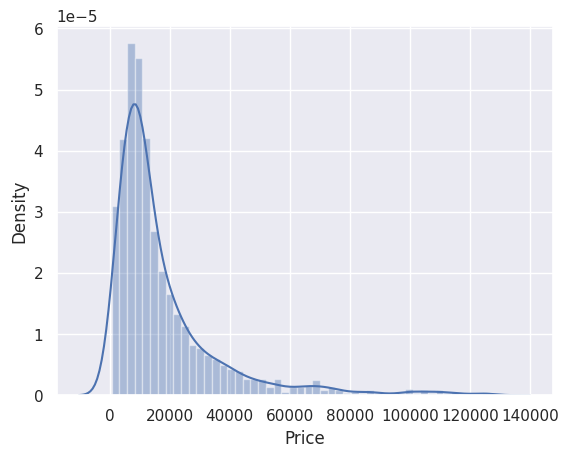

In [244]:
sns.distplot(data_1['Price'])

/tmp/ipykernel_13871/534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<AxesSubplot: xlabel='Mileage', ylabel='Density'>

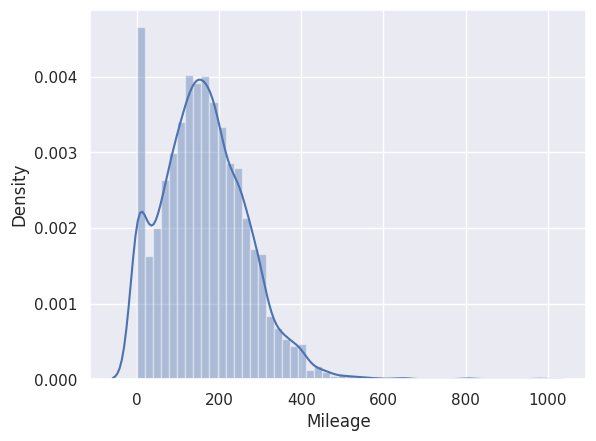

In [245]:
sns.distplot(data_no_mv['Mileage'])

In [246]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

/tmp/ipykernel_13871/1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<AxesSubplot: xlabel='Mileage', ylabel='Density'>

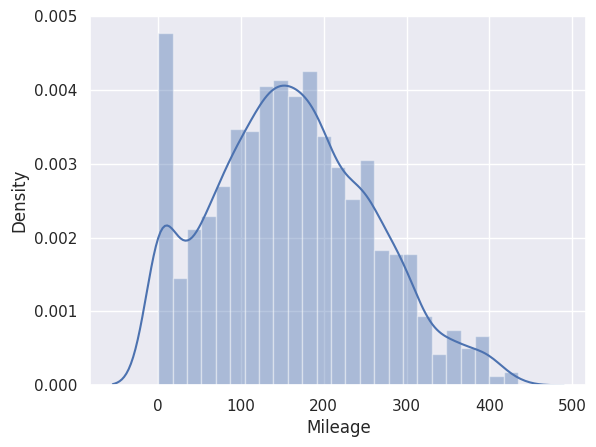

In [247]:
sns.distplot(data_2['Mileage'])

/tmp/ipykernel_13871/823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<AxesSubplot: xlabel='EngineV', ylabel='Density'>

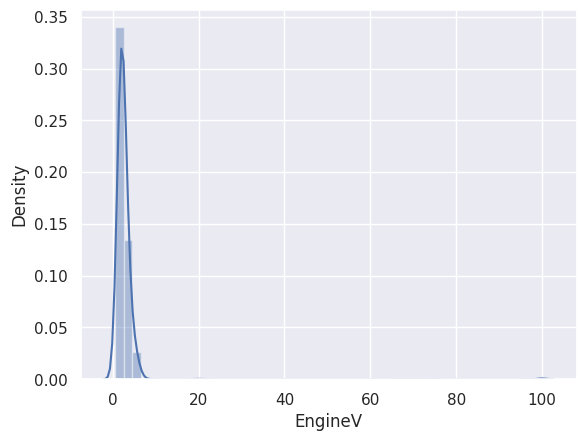

In [248]:
sns.distplot(data_no_mv['EngineV'])

In [249]:
data_3 = data_2[data_2['EngineV']<6.5]

/tmp/ipykernel_13871/1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<AxesSubplot: xlabel='EngineV', ylabel='Density'>

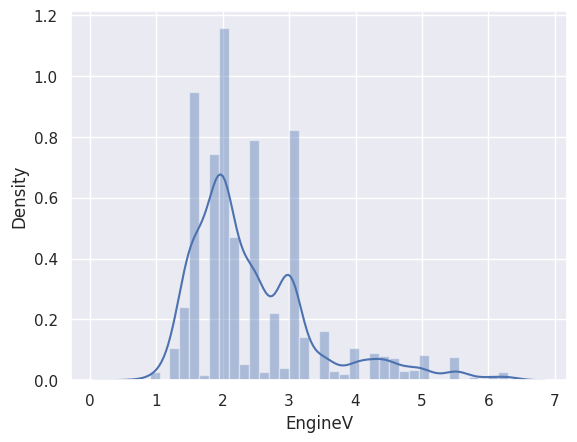

In [250]:
sns.distplot(data_3['EngineV'])

/tmp/ipykernel_13871/534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<AxesSubplot: xlabel='Year', ylabel='Density'>

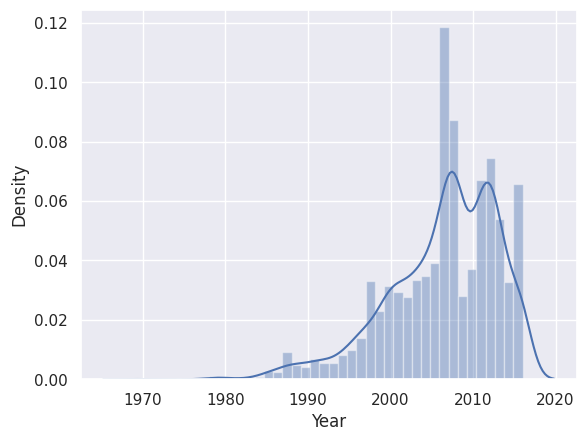

In [251]:
sns.distplot(data_no_mv['Year'])

In [252]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/tmp/ipykernel_13871/2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<AxesSubplot: xlabel='Year', ylabel='Density'>

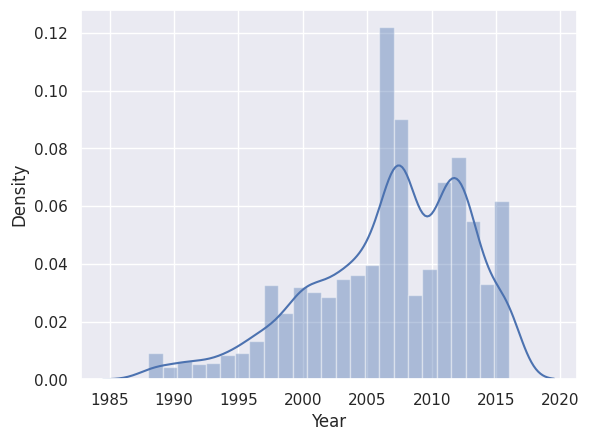

In [253]:
sns.distplot(data_4['Year'])

In [254]:
data_cleaned = data_4.reset_index(drop=True)

In [255]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


## Checking the OLS assumptions

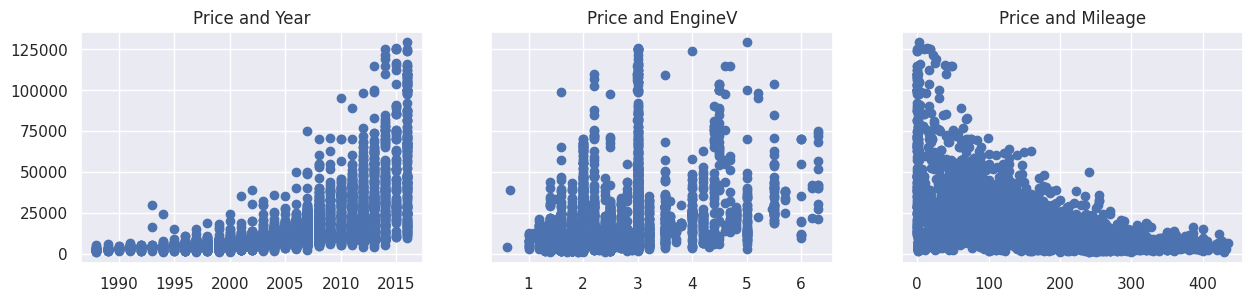

In [256]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

/tmp/ipykernel_13871/462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

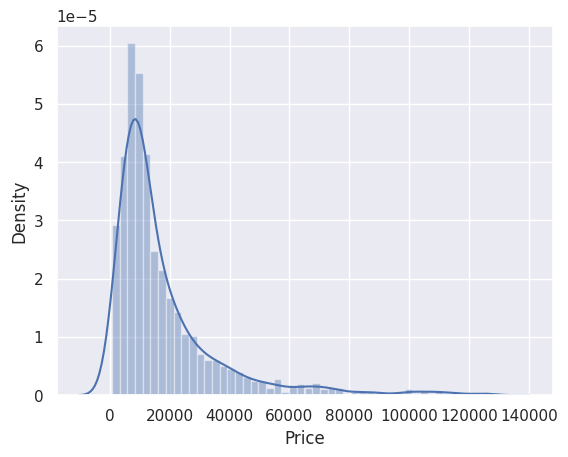

In [257]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [258]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


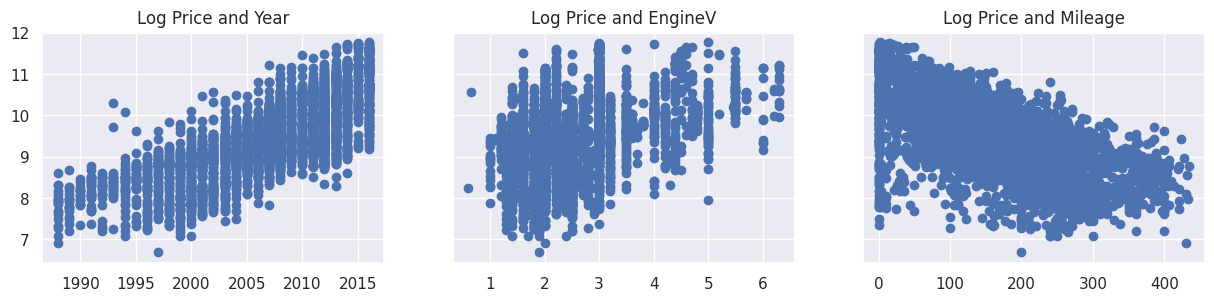

In [259]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [260]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [261]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [262]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [263]:
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [264]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [265]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [266]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [267]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [268]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [269]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [270]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop('log_price', axis=1)

In [271]:
# from sklearn.feature_selection import f_regression
# pvals = f_regression(inputs, targets)[1].round(3)
# pvals[pvals>0.05,]
# not_sig_col = np.where(pvals> 0.05)
# inputs.drop(inputs.columns[not_sig_col], axis=1, inplace=True)

### Scale the data

In [273]:
inputs['interaction'] = inputs['Mileage']*inputs['EngineV']
inputs = inputs[['Mileage', 'EngineV', 'interaction', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes']]
inputs.columns.values

array(['Mileage', 'EngineV', 'interaction', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [276]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# inputs.columns.values
# inputs[['Mileage', 'EngineV']]
# scaler.fit(inputs[['Mileage', 'EngineV', 'interaction']])
scaler.fit(inputs)

StandardScaler()

In [277]:
# not recommended to scale dummy vars.
# in ML we usually don't care as scaling has no effect on the predictive power of dummies
# once scalsed, though, they lose all their dummy meaning
# input_scaled = scaler.transform(inputs[['Mileage', 'EngineV', 'interaction']])
input_scaled = scaler.transform(inputs)

input_scaled
# inp_ndarray = inputs.drop(['Mileage', 'EngineV', 'interaction'], axis=1).to_numpy()
# input_scaled = np.concatenate((input_scaled, inp_ndarray), axis=1)

array([[ 1.2179077 , -0.47452478,  0.56389505, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854,  2.97436902, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629,  4.91775421, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -1.29248341, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075, -1.37526309, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.51400212, ..., -0.16209221,
        -0.75037043,  0.32137366]])

### Train Test Split

In [278]:
type(input_scaled)

numpy.ndarray

In [279]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=365)

In [280]:
# x type is ndarray
# y type is dataframe
# when we determined the target and inputs, both where dataframes
    # targets was a dataframe series
    # inputs is a dataframe
# during the scaling, inputs dataframe transformed into ndarray
# that means targets (ytrain and ytest) have there indices maintained
print(x_train)
print(x_test)
print(y_train.head())
print(y_test.head())

[[ 0.25577519 -1.106607   -0.47525418 ... -0.16209221  1.33267512
   0.32137366]
 [-0.86322675 -1.00125996 -0.97545483 ... -0.16209221 -0.75037043
   0.32137366]
 [-0.4344503  -0.47452478 -0.54922751 ... -0.16209221 -0.75037043
   0.32137366]
 ...
 [ 0.64271979  3.21262147  2.91342908 ... -0.16209221  1.33267512
   0.32137366]
 [ 1.24928159  0.05221039  1.07818586 ...  6.16932785 -0.75037043
  -3.11164272]
 [-0.58086177 -0.47452478 -0.64785863 ... -0.16209221 -0.75037043
   0.32137366]]
[[ 1.45844083  0.57894557  1.78269381 ... -0.16209221 -0.75037043
   0.32137366]
 [ 0.62180387 -0.15848368  0.39481314 ... -0.16209221  1.33267512
  -3.11164272]
 [-0.58086177 -1.106607   -0.86977863 ... -0.16209221  1.33267512
   0.32137366]
 ...
 [-1.36520892 -0.89591293 -1.21851007 ... -0.16209221  1.33267512
   0.32137366]
 [-1.66848982  1.10568075 -1.37526309 ... -0.16209221  1.33267512
   0.32137366]
 [-0.15208533 -0.89591293 -0.56472669 ... -0.16209221 -0.75037043
   0.32137366]]
1853   9.37
3467

### Create the regression

In [281]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### check the regression model
* one way is by scatter plot the target and predicted data
* another way is by plotting the distribution of residuals (difference between target and prediction)

In [282]:
y_hat = lm.predict(x_train)

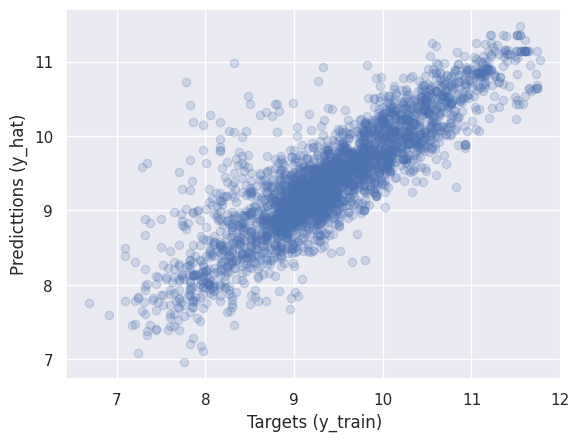

In [283]:
plt.scatter(y_train, y_hat, alpha=0.2)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predicttions (y_hat)')
plt.show()

In [284]:
r2 = lm.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.746099304372412

Text(0.5, 1.0, 'Residuals PDF')

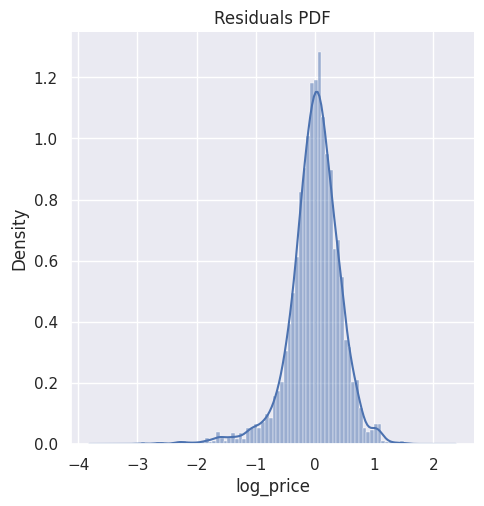

In [285]:
# the distribution should be normally distributed with mean of zero
# from the plot we can see it is a bit right-skewd. there is a longer tail on the negative side
# that means, the model is over-estimating the prices for certain observations
# as we don't see similar tail on the right-side, we can conclude that predictions rarely under-estimate the target
sns.displot(y_train-y_hat, kde=True, kde_kws=dict(cut=10), stat = 'density')
plt.title('Residuals PDF')

### Finding the weights and bias

In [286]:
inputs.columns.values

array(['Mileage', 'EngineV', 'interaction', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [287]:
lm_summary = pd.DataFrame(data=inputs.columns.values, columns=['Features'])
lm.coef_
# lm_summary

array([-0.32054524,  0.28147338, -0.15407681,  0.01685121,  0.0149415 ,
       -0.14192591, -0.17943001, -0.06302133, -0.08983805, -0.14285897,
       -0.10372846, -0.19714189, -0.13120071, -0.17139841, -0.1176903 ,
       -0.03300568, -0.1472826 ,  0.3229184 ])

In [288]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [289]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

### Testing

In [290]:
y_hat_test = lm.predict(x_test)

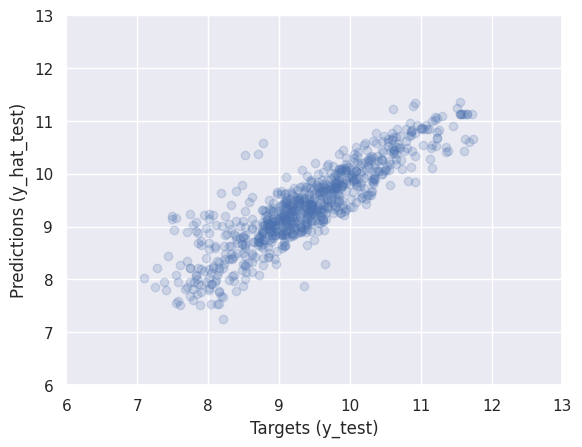

In [291]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [292]:
y_hat_test.shape
# sns.displot(y_test-y_hat_test, kde=True, kde_kws=dict(cut=10), stat = 'density')
# plt.title('Residuals PDF'

(774,)

### Confirm the model performance

In [293]:
df_pf = pd.DataFrame(data=np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()


,Prediction
0,10310.35
1,3475.97
2,7440.97
3,7409.11
4,11280.94


In [294]:
# the index is preserved during split
# panda tries to match the indices between the two dataframes
# but I don't understand why it is correct to reset the index
# I mean why index zero in y_hat can be matched with resetted index zero of y_test.
# ANS: because y_hat is created with the same order as the original y_test regardless of its indexing.
# then we create a new dataframe with index 0 with the new y_hat data
# so, we have to reset the y_test to make them match!
y_test = y_test.reset_index(drop=True)

In [295]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10310.35,2300.00
1,3475.97,2800.00
2,7440.97,2500.00
3,7409.11,6400.00
4,11280.94,9150.00
...,...,...
769,29278.64,29500.00
770,10732.38,9600.00
771,13216.35,18300.00
772,29187.01,68500.00


In [296]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.abs(df_pf['Residuals']/df_pf['Target']*100)

* The minimum difference in percentages is 0.06%. So the output was spot on. 
* The maximum difference in percentages, however, is pretty off mark.
* for upto 75% of the observations, the percentage difference is relatively small (about 39%) comapred to the max
    * that means there are a small number of observations that create such problem in the model
    * it might be due to missing variable (input)
    * it also could be that they are outliers
    * or the transformation is not good enough thus we need to use a different kind of transformation

In [297]:
df_pf.describe()

,Prediction,Target,Residuals,Difference%
count,774.00,774.00,774.00,774.00
mean,16090.42,18165.82,2075.40,35.95
std,13854.71,19967.86,10507.70,55.27
min,1417.92,1200.00,-35131.67,0.02
25%,7441.43,6900.00,-1970.23,11.22
50%,11452.60,11600.00,174.58,22.66
75%,19557.85,20500.00,3235.26,39.76
max,85843.20,126000.00,83156.05,534.13


In [298]:
pd.options.display.max_rows = 100
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# print(df_pf.sort_values(by=['Difference%']).head(5))
print(df_pf.sort_values(by=['Difference%']).tail(80))

     Prediction    Target  Residuals  Difference%
487    10941.63   6700.00   -4241.63        63.31
63      5392.82   3300.00   -2092.82        63.42
288     7046.24   4300.00   -2746.24        63.87
238    26455.89  16100.00  -10355.89        64.32
679    24719.01  69990.00   45270.99        64.68
436    42843.95 126000.00   83156.05        66.00
122    18773.25  55555.00   36781.75        66.21
621    40157.86 119000.00   78842.14        66.25
746    12580.21   7500.00   -5080.21        67.74
722    31811.17  18900.00  -12911.17        68.31
624    16877.89   9999.00   -6878.89        68.80
578     3208.58   1900.00   -1308.58        68.87
221    33992.23 109999.00   76006.77        69.10
56     14892.85   8800.00   -6092.85        69.24
463    34275.92  19990.00  -14285.92        71.47
477    15263.18   8900.00   -6363.18        71.50
326     9436.88   5500.00   -3936.88        71.58
215     5662.40   3300.00   -2362.40        71.59
455    11172.34   6500.00   -4672.34        71.88
